In [1]:
# Let's import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# let's remove the unnecessary warnings.
import warnings
warnings.filterwarnings("ignore")

Project Task: Week 1 (Applied data science with Python)
1. Import and aggregate data:


a. Collect information related to flights, airports (e.g., type of airport and elevation), and runways (e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause avoidable delays in one dataset.

In [3]:
# Now let's import the data for the further operation.
airline_df = pd.read_excel("Airlines.xlsx")

In [4]:
airline_df.shape

(518556, 9)

In [5]:
airline_df.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1


In [6]:
airport_df = pd.read_excel("airports.xlsx")

In [7]:
airport_df.shape

(73805, 18)

In [8]:
airport_df.head(2)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN


In [9]:
airport_df = airport_df.drop(['continent', 'iso_country', 'iso_region','municipality', 'gps_code','local_code', 'home_link',
                       'wikipedia_link', 'keywords'], axis=1)

In [10]:
airport_df.head(2)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,no,NaN


In [11]:
runway_df = pd.read_excel("runways.xlsx")

In [12]:
runway_df.shape

(43977, 20)

In [13]:
runway_df.head(2)

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN


In [14]:
runways_df = runway_df.drop(['le_ident', 'le_latitude_deg','le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg','he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft'], axis = 1)

In [15]:
runways_df.head(2)

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0


In [16]:
# Now lets merge the runways and airport data.
airport_runway = pd.merge(airport_df, runways_df, left_on = "ident", right_on = "airport_ident")
airport_runway.drop(['id_x', 'id_y'], axis=1, inplace=True)

In [17]:
airport_runway.head(2)

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN,6523,00A,80.0,80.0,ASPH-G,1,0
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN,6524,00AK,2500.0,70.0,GRVL,0,0


In [18]:
# Now lets merge the final column airline.
final_data = pd.merge(airline_df,airport_runway,how = "inner", left_on = "AirportFrom", right_on = "iata_code" )

In [19]:
final_data.drop_duplicates(subset=['id'], keep='first', inplace=True)
final_data.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
4,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0


b. When it comes to on-time arrivals, different airlines perform differently based on the amount of 
experience they have. The major airlines in this field include US Airways Express (founded in 
1967) Continental Airlines (founded in 1934), and Express Jet (founded in 19860. Pull such 
information specific to various airlines from the Wikipedia page link given below.
https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.

In [20]:
# Now lets use the web scrapping to import the data frome the wikipedia.
url = "https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States"
airline_tables = pd.read_html(url)

In [21]:
airline_tables[1].head(2)

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/Tacoma Anchorage Portland (OR) San Fra...,1932,Founded as McGee Airways and commenced operati...
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las Vegas Cincinnati Fort Walton Beach Indiana...,1997,Founded as WestJet Express and commenced opera...


In [22]:
airline_tables[2].head(2)

,Airline,Image,IATA,ICAO,Callsign,"Primary Hubs, Secondary Hubs",Founded,Notes
0,Air Wisconsin,NaN,ZW,AWI,WISCONSIN,Appleton Chicago-O'Hare Columbia Milwaukee Was...,1965,Operates as United Express
1,Cape Air,NaN,9K,KAP,CAIR,Hyannis Billings Boston Nantucket St. Louis Sa...,1988,NaN


In [23]:
# We have different tables, let us combine all the tables together

In [24]:
# Lets first merge all wikipedia table.
airline_table_final = [airline_tables[0],airline_tables[1],airline_tables[2],airline_tables[3],airline_tables[4],airline_tables[5],airline_tables[6]]

In [25]:
airline_table_final = pd.concat(airline_table_final, ignore_index=True)

In [26]:
airline_table_final.head(2)

,0,1,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes,"Primary Hubs, Secondary Hubs"
0,NaN,This article does not cite any sources. Please...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/Tacoma Anchorage Portland (OR) San Fra...,1932.0,Founded as McGee Airways and commenced operati...,NaN


c. You should then get all the information gathered so far in one place.


In [27]:
# First we got only that column from wiki pedia table that we need to merge.
airline_table_final_df = airline_table_final[['IATA', "Founded"]]
airline_table_final_df.head(2)

,IATA,Founded
0,NaN,NaN
1,AS,1932.0


In [28]:
# Now we gather all the information that we got from wiki pedia link and the data that we have.
final_df = final_data.merge(airline_table_final_df, left_on ='Airline', right_on = "IATA")

d. The total passenger traffic may also contribute to flight delays. The term hub refers to 
busy commercial airports. Large hubs are airports that account for at least 1 percent 
of the total passenger enplanements in the United States. Airports that account for 
0.25 percent to 1 percent of total passenger enplanements are considered medium 
hubs. Pull passenger traffic data from the Wikipedia page given below using web 
scraping and collate it in a table.
https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [29]:
url2 = "https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States"
busiest_airports_table = pd.read_html(url2)

In [30]:
busiest_airports_table[0].head(2)

,Rank (2021),Airports (large hubs),IATA Code,Major cities served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273,45308407,45798928
1,2,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567,29038128,28022904


In [31]:
busiest_airports_table[0]['traffic_change_20_21'] = busiest_airports_table[0]['2021[3]'] - busiest_airports_table[0]['2020[4]']

In [32]:
busiest_airports_table[0]['traffic_change_19_20'] = busiest_airports_table[0]['2020[4]'] - busiest_airports_table[0]['2019[5]']

In [33]:
busiest_airports_table[0]['hubs'] = str('large_hub')

In [34]:
busiest_airports_table[0] = busiest_airports_table[0][['IATA Code', 'traffic_change_20_21', 'traffic_change_19_20', 'hubs']]
busiest_airports_table[0].head(2)

,IATA Code,traffic_change_20_21,traffic_change_19_20,hubs
0,ATL,16116144,-32945929,large_hub
1,DFW,11411845,-17185152,large_hub


In [35]:
busiest_airports_table[1]['traffic_change_20_21'] = busiest_airports_table[1]['2021[3]'] - busiest_airports_table[1]['2020[4]']
busiest_airports_table[1]['traffic_change_19_20'] = busiest_airports_table[1]['2020[4]'] - busiest_airports_table[1]['2019[5]']

In [36]:
busiest_airports_table[1]['hubs'] = str('Medium_hub')

In [37]:
busiest_airports_table[1] = busiest_airports_table[1][['IATA Code', 'traffic_change_20_21', 'traffic_change_19_20','hubs']]
busiest_airports_table[1].head(2)

,IATA Code,traffic_change_20_21,traffic_change_19_20,hubs
0,DAL,2817633,-4738527,Medium_hub
1,HNL,2704537,-6862287,Medium_hub


In [38]:
busiest_airports = [busiest_airports_table[0],busiest_airports_table[1]]

In [39]:
busiest_airports_df = pd.concat(busiest_airports, ignore_index=True)

In [40]:
final_df = final_data.merge(busiest_airports_df, left_on ='iata_code', right_on = "IATA Code")

In [41]:
final_df.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,airport_ident,length_ft,width_ft,surface,lighted,closed,IATA Code,traffic_change_20_21,traffic_change_19_20,hubs
0,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,SFO,3980290,-20034173,large_hub
1,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,SFO,3980290,-20034173,large_hub


In [42]:
final_df = final_df.drop(['id','AirportFrom','airport_ident','iata_code','AirportTo','surface', 'ident',
                         'IATA Code','name'], axis=1)

2. You should then examine the missing values in each field, perform missing value 
treatment, and justify your actions.

In [43]:
# Now lets check the null value and treat them.
final_df.isnull().sum()

Airline                 0
Flight                  0
DayOfWeek               0
Time                    0
Length                  0
Delay                   0
type                    0
latitude_deg            0
longitude_deg           0
elevation_ft            0
scheduled_service       0
airport_ref             0
length_ft               0
width_ft                0
lighted                 0
closed                  0
traffic_change_20_21    0
traffic_change_19_20    0
hubs                    0
dtype: int64

In [44]:
# There are no null values in the dataset

3. Perform data visualization and share your insights on the following points:

a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Visualize it to compare it with the data of other airlines.

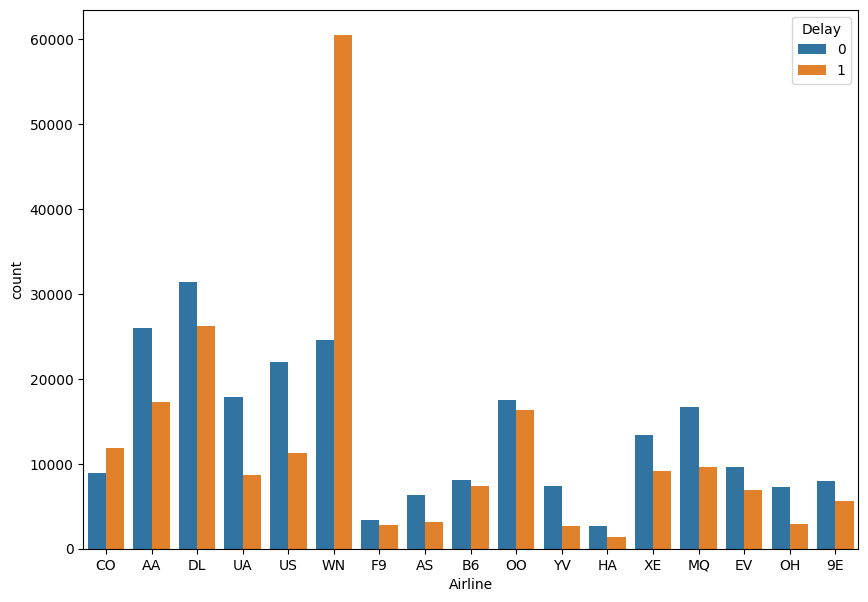

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(x='Airline', hue='Delay', data=final_df)
plt.show()

In [46]:
# The graph clear show that 70% of flight of south west airline (code of WN) is delayed


b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

In [47]:
weekday_df = final_df[['DayOfWeek','Delay']].value_counts().reset_index()

<Axes: xlabel='DayOfWeek', ylabel='0'>

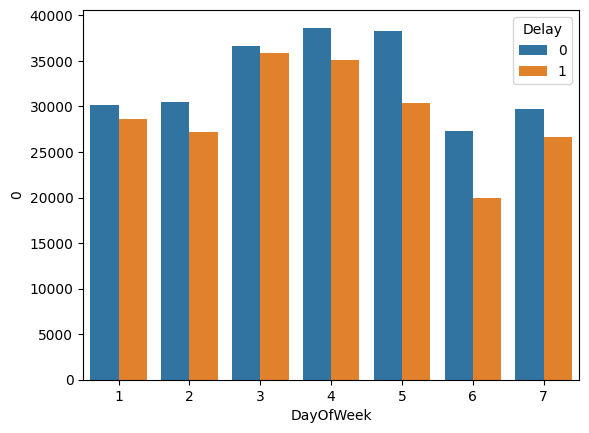

In [48]:
sns.barplot(x='DayOfWeek', y=0, hue='Delay', data=weekday_df)

In [49]:
# On the 5th or 6th day of week its clear that there is less no of flight delay.

c. Which airlines should be recommended for short-, medium-, and long-distance travel?

In [50]:
final_df['Airline'][final_df['Length']<200].value_counts()

WN    75941
DL    43872
OO    32965
AA    30246
US    26363
MQ    26076
XE    22114
EV    16553
UA    16388
9E    13573
CO    12261
B6    11628
OH     9963
YV     9884
AS     6350
F9     5406
HA     3034
Name: Airline, dtype: int64

In [51]:
# The above airlines should be recommended for short distance travel

In [52]:
final_df['Airline'][final_df['Length']>400].value_counts()

UA    549
AA    304
DL    226
CO    177
B6     83
US     79
AS     31
HA     14
Name: Airline, dtype: int64

In [53]:
# The above airlines should be recommended for long distance travel

In [54]:
# All the above airlines should be recommended for medium distance travel

d. Do you notice any patterns in the departure times of long-duration flights?

In [55]:
long = final_df[final_df['Length']>400]
long

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,scheduled_service,airport_ref,length_ft,width_ft,lighted,closed,traffic_change_20_21,traffic_change_19_20,hubs
11870,US,20,3,715,403,0,large_airport,33.435302,-112.005905,1135.0,yes,3772,10300.0,150.0,1,0,8408851,-11902116,large_hub
12362,US,20,4,715,403,0,large_airport,33.435302,-112.005905,1135.0,yes,3772,10300.0,150.0,1,0,8408851,-11902116,large_hub
12841,US,146,5,675,412,1,large_airport,33.435302,-112.005905,1135.0,yes,3772,10300.0,150.0,1,0,8408851,-11902116,large_hub
12865,US,20,5,715,403,0,large_airport,33.435302,-112.005905,1135.0,yes,3772,10300.0,150.0,1,0,8408851,-11902116,large_hub
13319,US,146,6,675,412,0,large_airport,33.435302,-112.005905,1135.0,yes,3772,10300.0,150.0,1,0,8408851,-11902116,large_hub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413895,UA,92,3,1416,404,0,medium_airport,20.898543,-156.431212,54.0,yes,5455,6995.0,150.0,1,0,1798174,-2656666,Medium_hub
413939,AA,6,4,1080,420,0,medium_airport,20.898543,-156.431212,54.0,yes,5455,6995.0,150.0,1,0,1798174,-2656666,Medium_hub
413955,UA,92,4,1416,404,0,medium_airport,20.898543,-156.431212,54.0,yes,5455,6995.0,150.0,1,0,1798174,-2656666,Medium_hub
414000,AA,6,5,1080,420,1,medium_airport,20.898543,-156.431212,54.0,yes,5455,6995.0,150.0,1,0,1798174,-2656666,Medium_hub


In [56]:
long['width_ft'].unique()

array([150., 200.])

In [57]:
final_df['width_ft'].unique()

array([200., 150., 100.,  75.])

In [58]:
# We can see that width of runway for long flights is 150 or 200

4. How many flights were delayed at large hubs compared to medium hubs? Use 
appropriate visualization to represent your findings.


<Axes: xlabel='hubs', ylabel='count'>

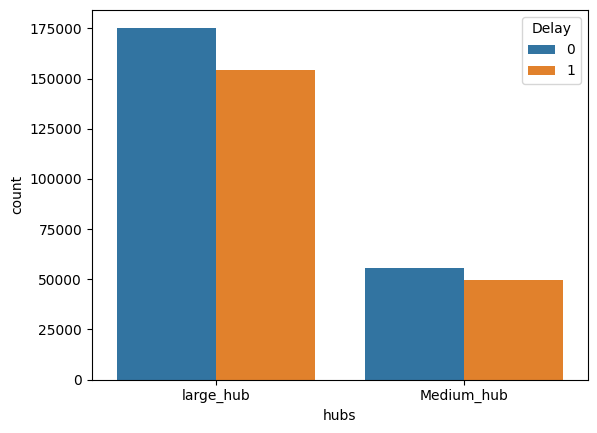

In [59]:
sns.countplot(x='hubs', hue='Delay', data=final_df)

In [60]:
# 150000 flights were delayed at large hubs compared to 50000 at medium hubs

5. Use hypothesis testing strategies to discover:

a. If the airport's altitude has anything to do with flight delays for incoming and 
departing flights

In [61]:
from scipy.stats import chi2_contingency
table = [final_df['latitude_deg'],final_df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Altitude and flight delay are probably independent')
else:
    print('Altitude and flight delay are probably dependent')

stat=235997.906, p=1.000
Altitude and flight delay are probably independent


b. If the number of runways at an airport affects flight delays

In [62]:
from scipy.stats import chi2_contingency
table = [final_df['airport_ref'],final_df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Number of runways and delay are probably independent')
else:
    print('Number of runways and delay are probably dependent')

stat=241372.507, p=1.000
Number of runways and delay are probably independent


c. If the duration of a flight (length) affects flight delays

In [63]:
from scipy.stats import spearmanr
data1 = final_df['Length']
data2 = final_df['Delay']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Duration of flight and delay are probably independent')
else:
    print('Duration of flight and delay are probably dependent')   

stat=0.020, p=0.000
Duration of flight and delay are probably dependent


6. Find the correlation matrix between the flight delay predictors, create a heatmap to 
visualize this, and share your findings

In [64]:
corr = final_df.corr()
corr

,Flight,DayOfWeek,Time,Length,Delay,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,traffic_change_20_21,traffic_change_19_20
Flight,1.000000,0.002269,0.043689,-0.337794,-0.045179,0.152883,0.088454,0.120979,-0.050394,0.029879,0.012713,0.060445,0.015213,0.075725,-0.109500
DayOfWeek,0.002269,1.000000,0.002635,0.013866,-0.025960,-0.010634,-0.006323,0.000425,0.003097,0.005228,0.003480,-0.004319,-0.004022,0.005440,-0.004073
Time,0.043689,0.002635,1.000000,-0.050408,0.135503,-0.031631,0.000388,0.033781,-0.014079,0.023236,0.029868,-0.004570,-0.012347,0.094924,-0.081149
Length,-0.337794,0.013866,-0.050408,1.000000,0.023412,0.027318,0.032629,-0.079260,-0.002509,0.075392,0.059915,0.016097,-0.042696,0.017518,-0.067547
Delay,-0.045179,-0.025960,0.135503,0.023412,1.000000,0.024829,-0.034535,0.020978,-0.003039,-0.047662,-0.013209,0.018187,0.006584,-0.015961,0.011029
latitude_deg,0.152883,-0.010634,-0.031631,0.027318,0.024829,1.000000,0.084202,0.201612,-0.089998,-0.015735,-0.023087,0.191397,0.097754,-0.086251,-0.030518
longitude_deg,0.088454,-0.006323,0.000388,0.032629,-0.034535,0.084202,1.000000,-0.222753,-0.196454,0.076358,-0.001285,0.318683,-0.047516,0.050641,-0.038413
elevation_ft,0.120979,0.000425,0.033781,-0.079260,0.020978,0.201612,-0.222753,1.000000,0.221794,0.223794,-0.140600,-0.142687,-0.005079,0.270102,-0.039259
airport_ref,-0.050394,0.003097,-0.014079,-0.002509,-0.003039,-0.089998,-0.196454,0.221794,1.000000,0.015004,-0.015558,-0.663213,-0.020885,-0.195977,0.178396
length_ft,0.029879,0.005228,0.023236,0.075392,-0.047662,-0.015735,0.076358,0.223794,0.015004,1.000000,0.200062,0.074199,-0.219117,0.251813,-0.174391


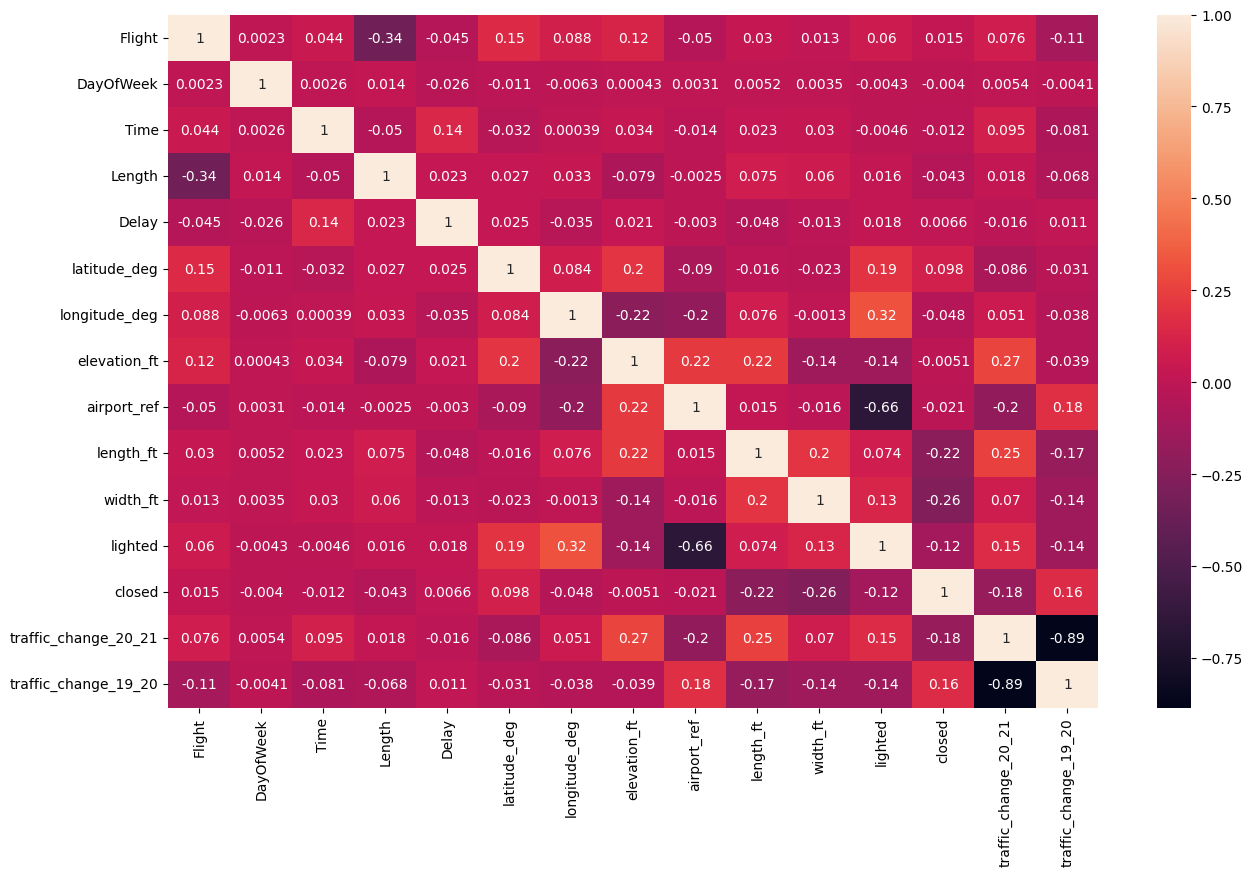

In [65]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.show()

In [66]:
# Traffic change 20-21 is having a negative correlation of -0.89 with traffic change 19-20

Project Task: Week 1 (Machine learning)

1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434974 entries, 0 to 434973
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Airline               434974 non-null  object 
 1   Flight                434974 non-null  int64  
 2   DayOfWeek             434974 non-null  int64  
 3   Time                  434974 non-null  int64  
 4   Length                434974 non-null  int64  
 5   Delay                 434974 non-null  int64  
 6   type                  434974 non-null  object 
 7   latitude_deg          434974 non-null  float64
 8   longitude_deg         434974 non-null  float64
 9   elevation_ft          434974 non-null  float64
 10  scheduled_service     434974 non-null  object 
 11  airport_ref           434974 non-null  int64  
 12  length_ft             434974 non-null  float64
 13  width_ft              434974 non-null  float64
 14  lighted               434974 non-null  int64  
 15  

In [68]:
# Scheduled service has value "yes" in all rows, let us remove it since it doesnt help in prediction

In [69]:
final_df = final_df.drop(['scheduled_service'], axis=1)

In [70]:
final_df.to_csv('airlines_new.csv', index = True)

In [71]:
from sklearn.preprocessing import LabelEncoder 

In [72]:
le = LabelEncoder()

In [73]:
final_df['Airline'] = le.fit_transform(final_df['Airline'])
final_df['type'] = le.fit_transform(final_df['type'])
final_df['hubs'] = le.fit_transform(final_df['hubs'])

In [74]:
final_df.head()

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,traffic_change_20_21,traffic_change_19_20,hubs
0,4,269,3,15,205,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,3980290,-20034173,1
1,1,2466,3,20,195,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,3980290,-20034173,1
2,5,2606,3,35,216,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,3980290,-20034173,1
3,5,1580,3,345,270,0,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,3980290,-20034173,1
4,12,756,3,348,158,0,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,3980290,-20034173,1


2. Perform the following model building steps:

a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models
b. Use the stratified five-fold method to build and validate the models
c. Use RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation
d. Keep a few data points (10%) for prediction purposes to evaluate how you would make the final prediction, and do not use this data for testing or validation
g. Compare the results of logistic regression and decision tree classifier

In [75]:
# Seperating the predictors and the output variable
x = final_df.drop(['Delay'], axis= 1)
y = final_df["Delay"]

In [76]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [77]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=10)

LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
params = {"penalty": ["l1","l2"],
         'solver': ['newton-cg', 'liblinear']}

# Cross Validation
folds = 5

rscv = RandomizedSearchCV(estimator = lr,
                         param_distributions = params,
                         scoring = "accuracy",
                         verbose = 1,
                         cv= folds)

rscv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'liblinear']},
                   scoring='accuracy', verbose=1)

In [81]:
print(rscv.best_params_)
print(rscv.best_score_)

{'solver': 'newton-cg', 'penalty': 'l2'}
0.5808555257836805


In [82]:
lr = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
lr.fit(x_train,y_train).score(x_train,y_train)

0.5810011341691445

In [83]:
lr.score(x_test, y_test)

0.5863947767713458

DecisionTreeClassifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

params = {'criterion': ["gini", "entropy"],
          'min_samples_leaf' : [2,3,4,5,6,7,8,9],
         "max_depth": [2,3,4,5,6,7,8,9]}

rscv = RandomizedSearchCV(estimator = dt,
                             param_distributions= params,
                             scoring = "accuracy",
                             cv= 5,
                             verbose=1)
rscv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9]},
                   scoring='accuracy', verbose=1)

In [85]:
print(rscv.best_params_)
print(rscv.best_score_)

{'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'entropy'}
0.6435566921164465


In [86]:
dtc = DecisionTreeClassifier(max_depth= 9, criterion= 'entropy',min_samples_leaf= 6)

In [87]:
dtc.fit(x_train, y_train).score(x_train, y_train)

0.6493143896432987

In [88]:
dtc.score(x_test, y_test)

0.6431789967354821

3. Use the stratified five-fold method to build and validate the models using the XGB classifier, compare all methods, and share your findings

In [89]:
from xgboost import XGBClassifier

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
                 'n_estimators': range(8, 20),
                 'max_depth': range(6, 10),
                 'learning_rate': [.4, .45, .5, .55, .6],
                 'colsample_bytree': [.6, .7, .8, .9, 1]
                  }

# Instantiate the regressor: gbm
gbm = XGBClassifier()

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 3)

# Fit randomized_mse to the data
xgb_random.fit(x_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'n_estimators': 18, 'max_depth': 9, 'learning_rate': 0.5, 'colsample_bytree': 0.6}
Best accuracy found:  0.6610647906895952


In [90]:
xgb = XGBClassifier(n_estimators=14, max_depth=9, learning_rate=0.45, colsample_bytree=0.9)
xgb.fit(x_train,y_train).score(x_train,y_train)

0.6806802971318804

In [91]:
# Now lets compare the all method.
print(lr.score(x_test, y_test))
print(dtc.score(x_test, y_test))
print(xgb.score(x_test, y_test))

0.5863947767713458
0.6431789967354821
0.6620534277438043
